In [1]:
# Importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the File
student=pd.read_csv('student_scores - student_scores.csv')
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Dimension rows and columns 
student.shape

(25, 2)

In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There is no null value value presnt

In [5]:
# statstical Description
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


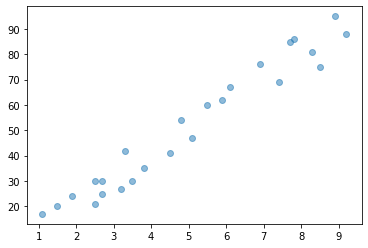

In [6]:
plt.scatter(x=student['Hours'],y=student['Scores'],alpha=0.5)
plt.show()

This plot shows that as time in hours increses scores also increses 

## Split data intoTrain and Test part

In [7]:
X=student['Hours']
y=student['Scores']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17,)
(8,)
(17,)
(8,)


In [10]:
X_train_reshaped=X_train.values.reshape(-1,1)
X_test_reshaped=X_test.values.reshape(-1,1)
y_train_reshaped=y_train.values.reshape(-1,1)
y_test_reshaped=y_test.values.reshape(-1,1)

## Creating Model

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [12]:
reg.fit(X_train_reshaped,y_train_reshaped)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
reg.score(X_train_reshaped,y_train_reshaped)

0.9484997422695115

In [14]:
reg.score(X_test_reshaped,y_test_reshaped)

0.9568211104435257

In [15]:
y_pred =reg.predict(X_test_reshaped)
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [16]:
df=pd.DataFrame(y_pred)
df['actual']=pd.DataFrame(y_test_reshaped)
df.rename(columns={0:"Predicted"},inplace=True)

In [17]:
# Comparing Actual vs Predicted
df

,Predicted,actual
0,17.053665,20
1,33.694229,27
2,74.806209,69
3,26.842232,30
4,60.123359,62
5,39.567369,35
6,20.969092,24
7,78.721636,86


In [18]:
# intercept Variable
reg.intercept_

array([2.37081538])

In [19]:
# coeefficent value
reg.coef_

array([[9.78856669]])

In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315


The final model
### Scores = 2.37081538 + 9.78856669*Hours

In [20]:
op= reg.intercept_+ reg.coef_* 9.5
op

array([[95.36219891]])